In [1]:
# 1. Get essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from vnstock import *

Observations:  1635


<Axes: xlabel='Time'>

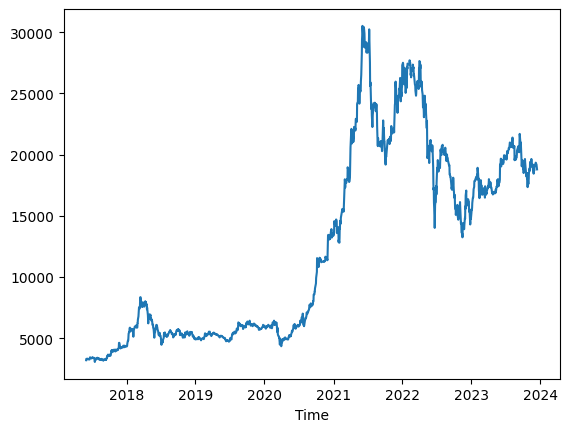

In [2]:
#2. Fetch data and visualize
VIB = stock_historical_data(symbol = "VIB", start_date="2017-06-01", end_date="2023-12-15", resolution="1D", type = "stock", beautify=True, decor=True, source = "DNSE")
from matplotlib import pyplot
print("Observations: ",len(VIB['Close']))
VIB
VIB["Close"].plot()

In [3]:
# Preprocessing
df = VIB['Close']
df=df.reset_index()
df['Lag1'] = range(0, 1635)
df['Lag2'] = df['Lag1'].shift(1)
df['Lag3'] = df['Lag2'].shift(1)
df = df.dropna()
df

,Time,Close,Lag1,Lag2,Lag3
2,2017-06-05,3290,2,1.0,0.0
3,2017-06-06,3320,3,2.0,1.0
4,2017-06-07,3340,4,3.0,2.0
5,2017-06-08,3310,5,4.0,3.0
6,2017-06-09,3290,6,5.0,4.0
...,...,...,...,...,...
1630,2023-12-11,19200,1630,1629.0,1628.0
1631,2023-12-12,19200,1631,1630.0,1629.0
1632,2023-12-13,19050,1632,1631.0,1630.0
1633,2023-12-14,18900,1633,1632.0,1631.0


In [4]:
#3. Slit the data into train : test with ratio 8:2
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))

train_data = df[:train_size]
test_data = df[train_size:]

In [5]:
#4. Training process
x_train = np.array([train_data['Lag1'],train_data['Lag2'], train_data['Lag3']]).reshape(-1, 3)
y_train = np.array(train_data['Close'])

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [6]:
# 5. Testing process
x_test = np.array([test_data['Lag1'],test_data['Lag2'], test_data['Lag3']]).reshape(-1, 3)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)
y_pred

array([12830.98724375, 12839.08813509, 12847.18902644, 12855.28991778,
       12863.39080913, 12871.49170048, 12879.59259182, 12887.69348317,
       12895.79437451, 12903.89526586, 12911.99615721, 12920.09704855,
       12928.1979399 , 12936.29883124, 12944.39972259, 12952.50061394,
       12960.60150528, 12968.70239663, 12976.80328797, 12984.90417932,
       12993.00507066, 13001.10596201, 13009.20685336, 13017.3077447 ,
       13025.40863605, 13033.50952739, 13041.61041874, 13049.71131009,
       13057.81220143, 13065.91309278, 13074.01398412, 13082.11487547,
       13090.21576682, 13098.31665816, 13106.41754951, 13114.51844085,
       13122.6193322 , 13130.72022355, 13138.82111489, 13146.92200624,
       13155.02289758, 13163.12378893, 13171.22468028, 13179.32557162,
       13187.42646297, 13195.52735431, 13203.62824566, 13211.729137  ,
       13219.83002835, 13227.9309197 , 13236.03181104, 13244.13270239,
       13252.23359373, 13260.33448508, 13268.43537643, 13276.53626777,
      

In [7]:
# 6. 60 days prediction
last_index =  len(df)
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)
range_arr_1 = np.array(range(last_index+1, last_index+61))
range_arr_2 = np.array(range(last_index, last_index+60))
range_arr_3 = np.array(range(last_index-1, last_index+59))

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array([range_arr_1,
                          range_arr_2,
                          range_arr_3]).reshape(-1, 3)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[13711.28410334 13719.38499468 13727.48588603 13735.58677737
 13743.68766872 13751.78856007 13759.88945141 13767.99034276
 13776.0912341  13784.19212545 13792.2930168  13800.39390814
 13808.49479949 13816.59569083 13824.69658218 13832.79747353
 13840.89836487 13848.99925622 13857.10014756 13865.20103891
 13708.58380622 13716.68469757 13724.78558891 13732.88648026
 13740.98737161 13749.08826295 13757.1891543  13765.29004564
 13773.39093699 13781.49182833 13789.59271968 13797.69361103
 13805.79450237 13813.89539372 13821.99628506 13830.09717641
 13838.19806776 13846.2989591  13854.39985045 13862.50074179
 13705.88350911 13713.98440045 13722.0852918  13730.18618314
 13738.28707449 13746.38796584 13754.48885718 13762.58974853
 13770.69063987 13778.79153122 13786.89242257 13794.99331391
 13803.09420526 13811.1950966  13819.29598795 13827.39687929
 13835.49777064 13843.59866199 13851.69955333 13859.80044468]


In [8]:
# 7. Evaluation
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

def MSLE (pred, actual):
    return np.mean((np.log(1+actual)-np.log(1+pred))*(np.log(1+actual)-np.log(1+pred)))
print("MSLR: ", MSLE(y_pred, y_test))

Testing RMSE: 5022.9859491296365
Testing MAPE: 25.140379033082766
Testing MAE: 4656.771553625337
MSLR:  0.09903331017730976


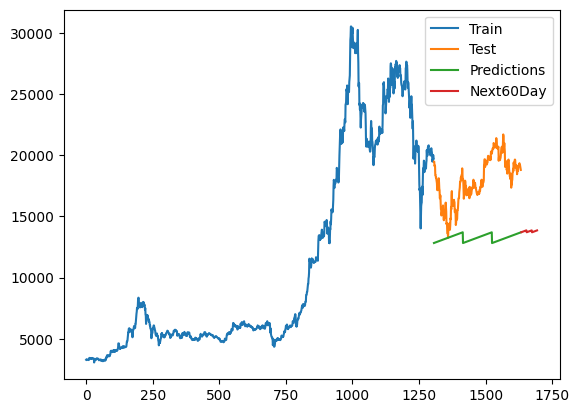

In [9]:
train_range = range(train_size)
test_range = range(train_size, train_size+test_size+1)

# 8.Visualize the result
plt.plot(train_range, train_data['Close'])
plt.plot(test_range, test_data['Close'])
plt.plot(test_range, y_pred)
plt.plot(range_arr_1,y_next_60_days)
plt.legend(['Train', 'Test','Predictions', 'Next60Day'])
plt.show()